<a href="https://colab.research.google.com/github/nuwanc/ml/blob/main/crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-6b6150574d41>:7: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])
<ipython-input-8-6b6150574d41>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])


Missing Values in Each Column:
Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location    

<ipython-input-8-6b6150574d41>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data['Latitude'].fillna(crime_data['Latitude'].mean(), inplace=True)
<ipython-input-8-6b6150574d41>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Data Preparation Complete. Sample Data:
   Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201202980         3550  180042096  08/23/2018 09:52:08 PM        35B   
1    201181293         3522  180015424  03/30/2018 01:00:55 AM        35A   
2    201181293         3562  180015424  03/30/2018 01:00:55 AM        35A   
3    201193163         3520  180029476  06/14/2018 10:26:45 PM        35A   
4    201204355         2204  180043926  09/03/2018 12:06:54 PM        220   

   Victims             Crime Name1                     Crime Name2  \
0        1   CRIME AGAINST SOCIETY       Drug Equipment Violations   
1        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
2        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
3        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
4        1  CRIME AGAINST PROPERTY  Burglary/Breaking and Entering   

                              Crime Name3 Police District Name  ...  \
0    

<Figure size 1400x800 with 0 Axes>

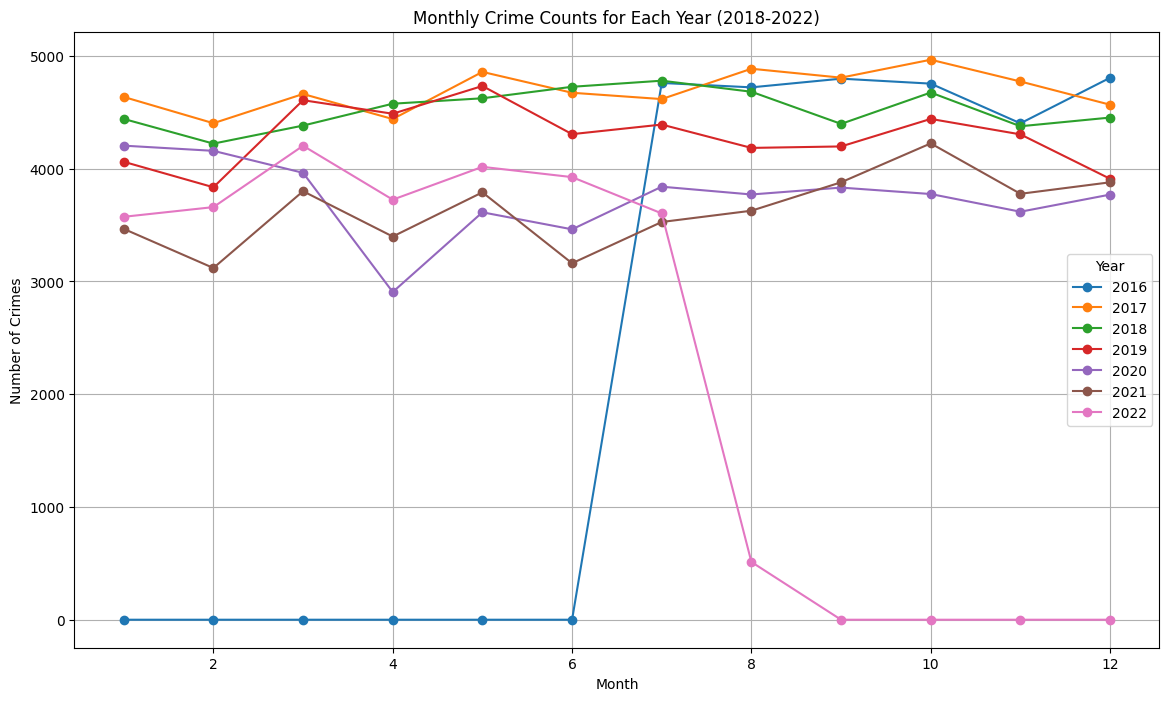

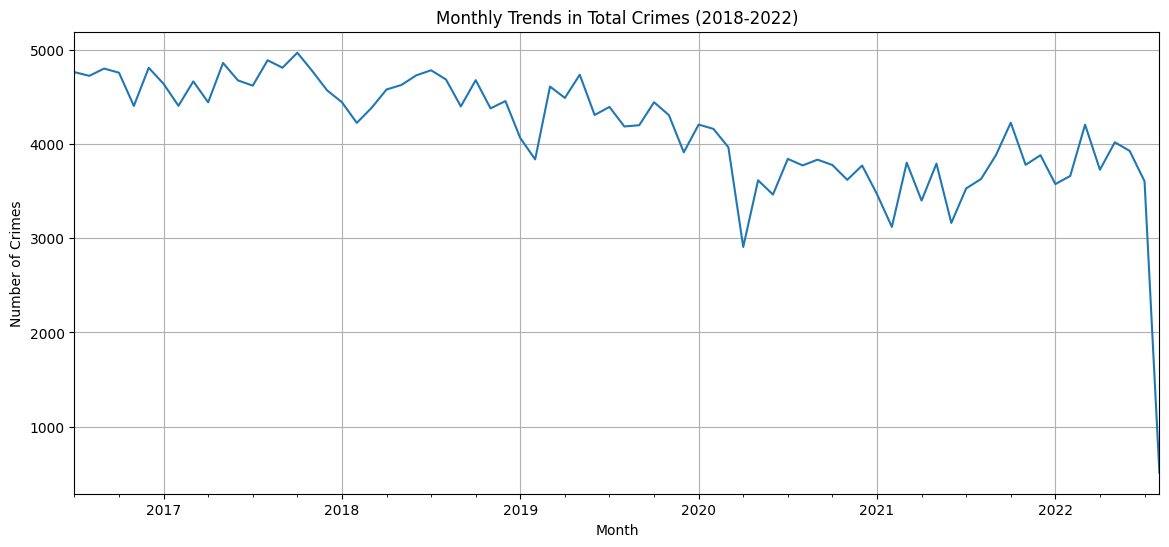

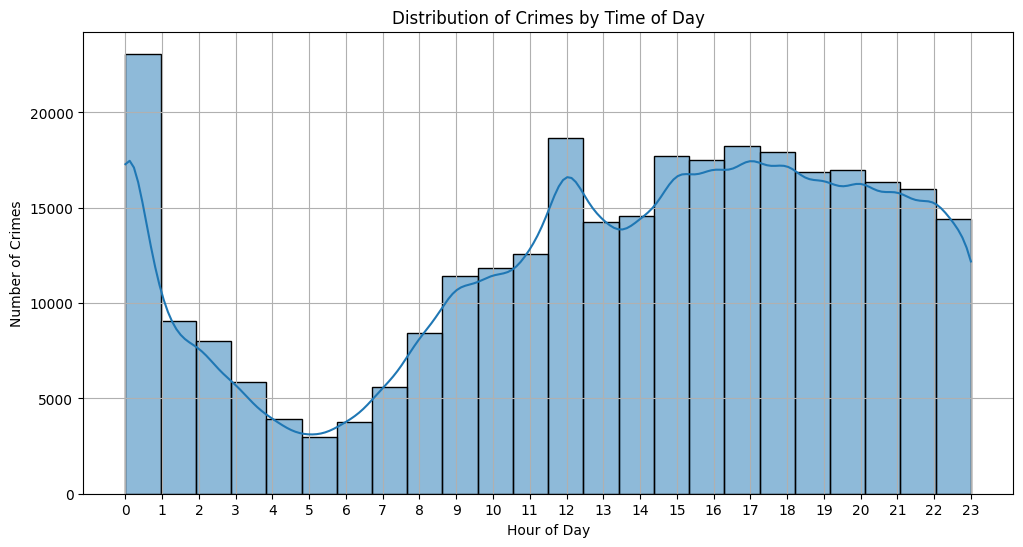

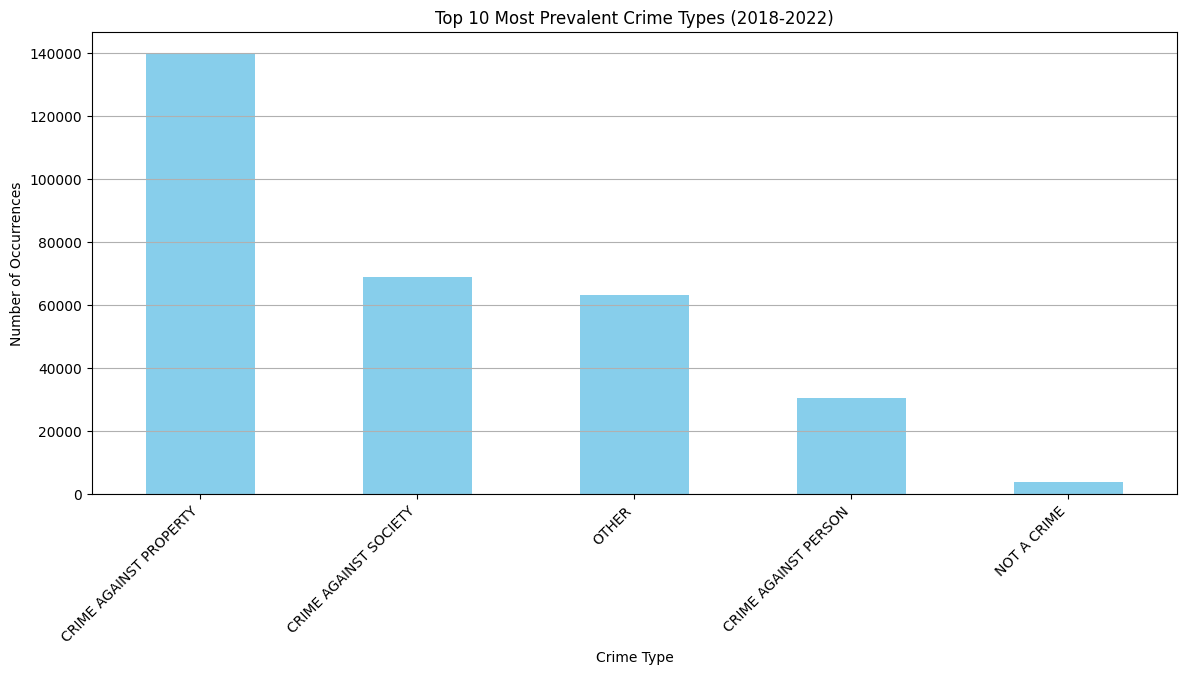

No data available for the selected crime types to plot.


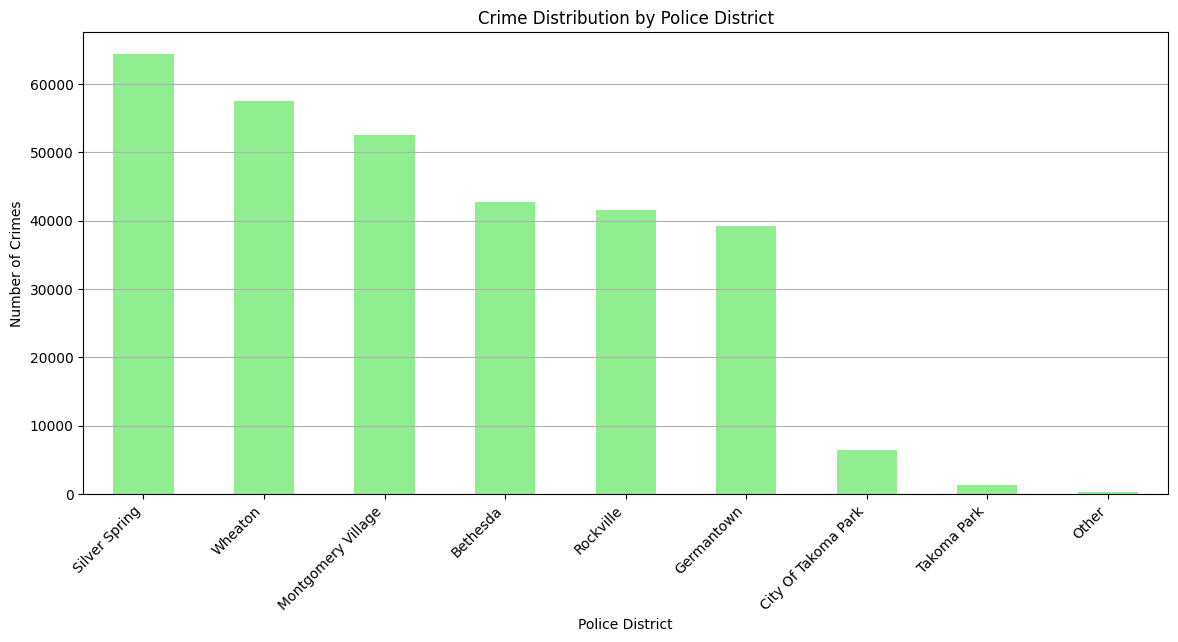

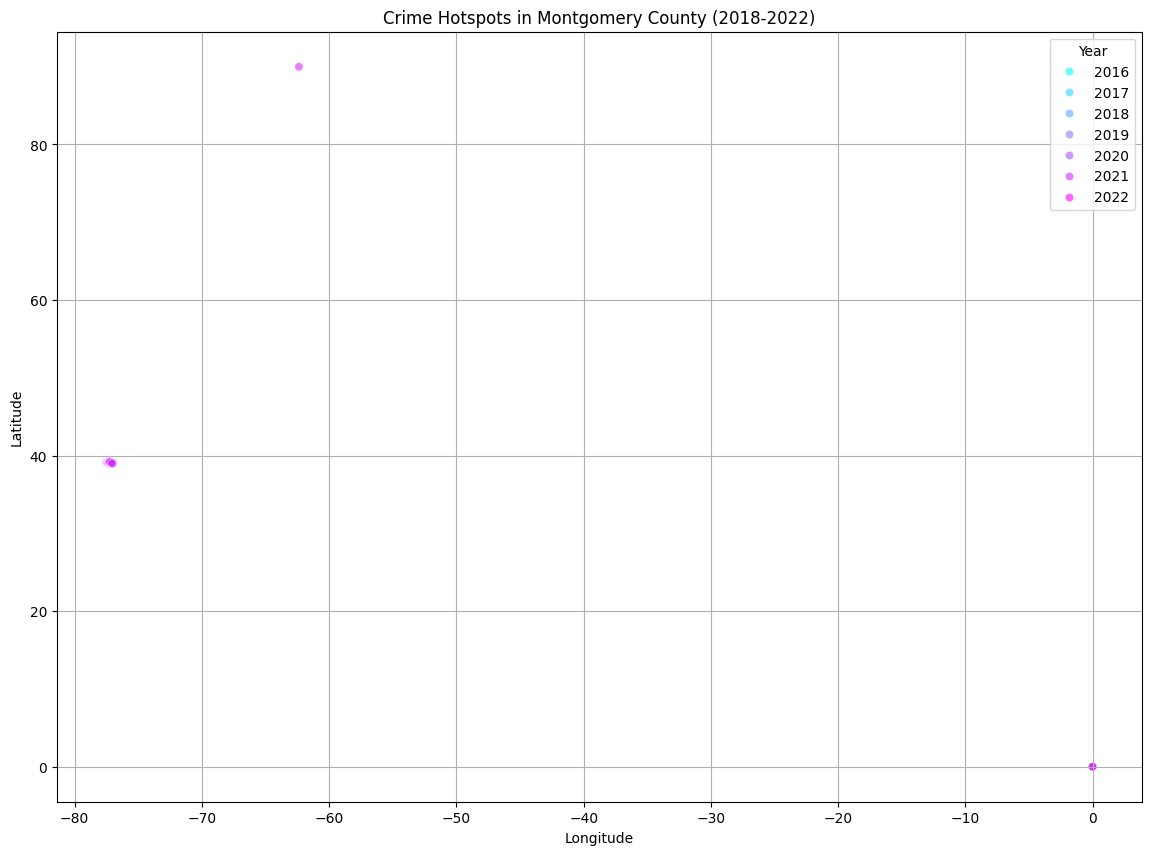

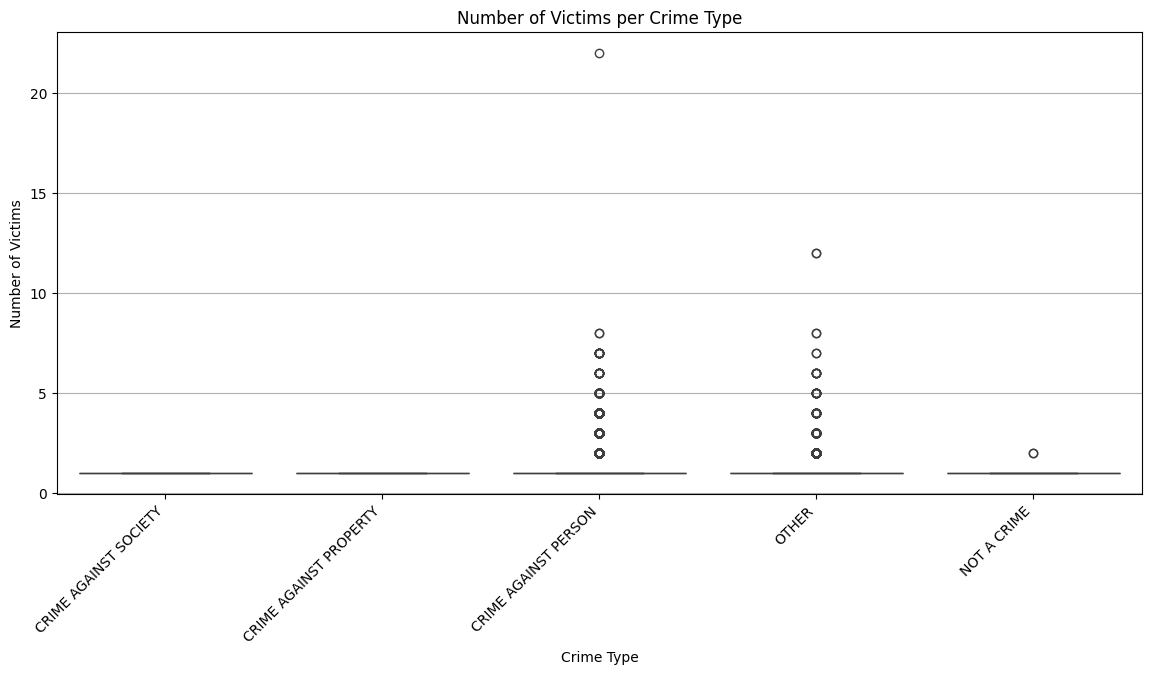

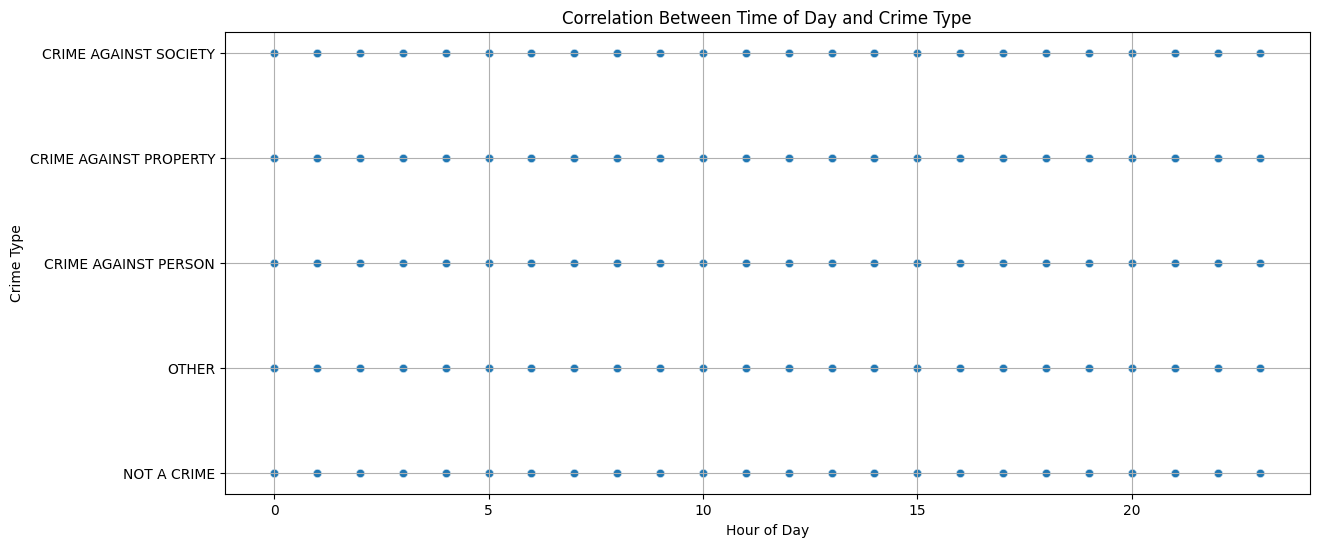

ValueError: Contour levels must be increasing

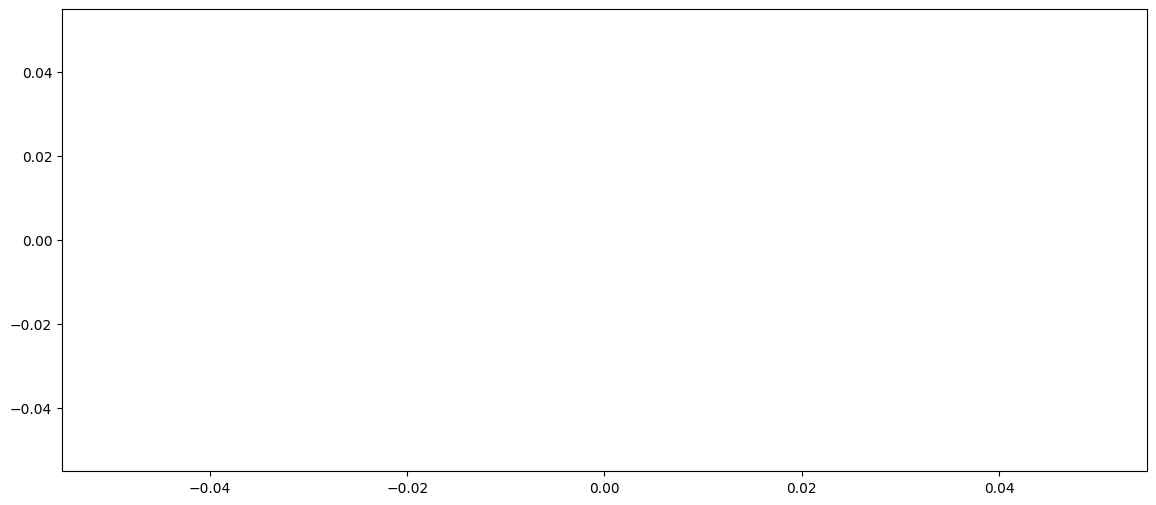

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Crime_Dataset_Coursework1.csv'
crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])

# Data Preparation Steps
# Step 1: Check for missing values
missing_values = crime_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Step 2: Handle missing values
# For simplicity, fill missing Latitude and Longitude with the mean of the column
crime_data['Latitude'].fillna(crime_data['Latitude'].mean(), inplace=True)
crime_data['Longitude'].fillna(crime_data['Longitude'].mean(), inplace=True)

# Step 3: Convert categorical columns to consistent formats (if needed)
crime_data['Crime Name1'] = crime_data['Crime Name1'].str.upper()
crime_data['Police District Name'] = crime_data['Police District Name'].str.title()

# Step 4: Extract useful time-related features using 'Start_Date_Time'
crime_data['Year'] = crime_data['Start_Date_Time'].dt.year
crime_data['Month'] = crime_data['Start_Date_Time'].dt.month
crime_data['YearMonth'] = crime_data['Start_Date_Time'].dt.to_period('M')
crime_data['Hour'] = crime_data['Start_Date_Time'].dt.hour

# Step 5: Clean non-numerical values in critical columns (if any)
# Ensure 'Year' column has only valid numerical values
crime_data = crime_data[pd.to_numeric(crime_data['Year'], errors='coerce').notnull()]
crime_data['Year'] = crime_data['Year'].astype(int)

# Verify the data after preparation
print("Data Preparation Complete. Sample Data:")
print(crime_data.head())

# Get each month's crime count for each year
monthly_yearly_crime_counts = crime_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
print("Monthly Crime Counts for Each Year:")
print(monthly_yearly_crime_counts)

# Plot monthly crime counts for each year
plt.figure(figsize=(14, 8))
monthly_yearly_crime_counts.T.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Crime Counts for Each Year (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Year')
plt.show()

# 1. Monthly Trends in Total Crimes (RQ1)
monthly_crime_counts = crime_data.groupby('YearMonth').size()
plt.figure(figsize=(14, 6))
monthly_crime_counts.plot(kind='line')
plt.title('Monthly Trends in Total Crimes (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# 2. Distribution of Crimes by Time of Day (RQ2)
plt.figure(figsize=(12, 6))
sns.histplot(crime_data['Hour'], bins=24, kde=True)
plt.title('Distribution of Crimes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# 3. Prevalent Crime Types (RQ3)
crime_type_counts = crime_data['Crime Name1'].value_counts().head(10)
plt.figure(figsize=(14, 6))
crime_type_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prevalent Crime Types (2018-2022)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 4. Annual Change in Specific Crimes (RQ4)
selected_crime_types = crime_data[crime_data['Crime Name1'].isin(['DRUG/NARCOTIC VIOLATIONS', 'BURGLARY/BREAKING AND ENTERING'])]
annual_crime_counts = selected_crime_types.groupby(['Year', 'Crime Name1']).size().unstack()

# Check if there is valid data for plotting
if not annual_crime_counts.empty:
    annual_crime_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title('Annual Change in Selected Crime Types (2018-2022)')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(axis='y')
    plt.show()
else:
    print("No data available for the selected crime types to plot.")

# 5. Crime Distribution by Police District (RQ5)
police_district_counts = crime_data['Police District Name'].value_counts()
plt.figure(figsize=(14, 6))
police_district_counts.plot(kind='bar', color='lightgreen')
plt.title('Crime Distribution by Police District')
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 6. Crime Hotspots Over Time (RQ6)
plt.figure(figsize=(14, 10))
sns.scatterplot(data=crime_data, x='Longitude', y='Latitude', hue='Year', palette='cool', alpha=0.6)
plt.title('Crime Hotspots in Montgomery County (2018-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# 7. Victims per Crime Type (RQ7)
plt.figure(figsize=(14, 6))
sns.boxplot(data=crime_data, x='Crime Name1', y='Victims')
plt.title('Number of Victims per Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 8. Correlation Between Time and Severity (RQ8)
plt.figure(figsize=(14, 6))
sns.scatterplot(data=crime_data, x='Hour', y='Crime Name1', alpha=0.6)
plt.title('Correlation Between Time of Day and Crime Type')
plt.xlabel('Hour of Day')
plt.ylabel('Crime Type')
plt.grid(True)
plt.show()

# 9. Location and Crime Frequency Correlation (RQ9)
plt.figure(figsize=(14, 6))
if crime_data['Longitude'].nunique() > 1 and crime_data['Latitude'].nunique() > 1:
    sns.kdeplot(data=crime_data, x='Longitude', y='Latitude', cmap='Reds', fill=True, bw_adjust=0.5, thresh=0.05)
    plt.title('Density Plot of Crime Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print("Not enough variance in location data to create a density plot.")

# 10. Seasonal Influence on Crime Types (RQ10)
seasonal_crime_counts = crime_data.groupby([crime_data['Start_Date_Time'].dt.month, 'Crime Name1']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
seasonal_crime_counts.plot(kind='line', figsize=(14, 8))
plt.title('Seasonal Influence on Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

ValueError: Contour levels must be increasing

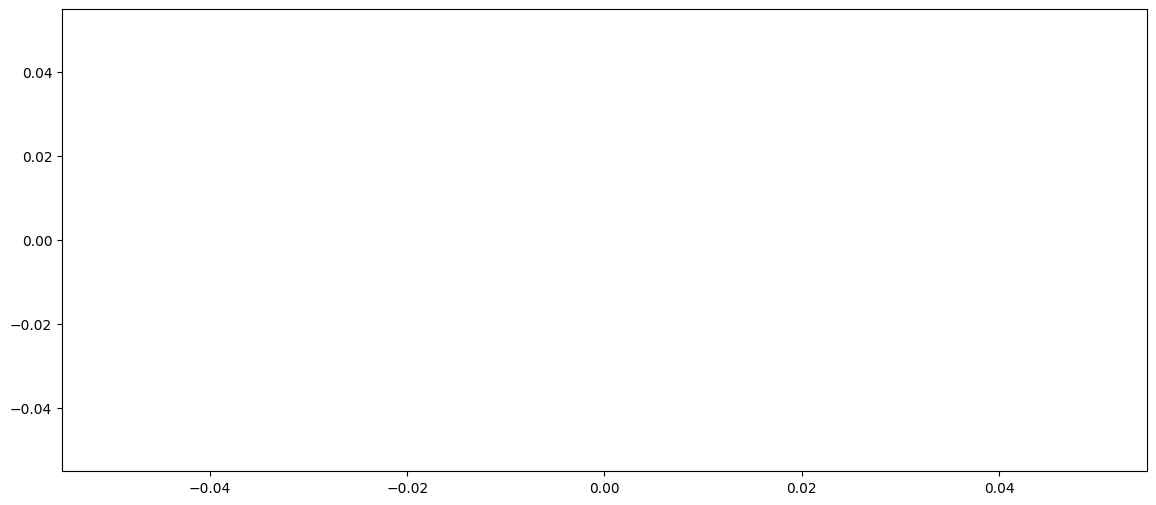

In [9]:
# 9. Location and Crime Frequency Correlation (RQ9)
plt.figure(figsize=(14, 6))
if crime_data['Longitude'].nunique() > 1 and crime_data['Latitude'].nunique() > 1:
    sns.kdeplot(data=crime_data, x='Longitude', y='Latitude', cmap='Reds', fill=True, bw_adjust=0.5, thresh=0.05)
    plt.title('Density Plot of Crime Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print("Not enough variance in location data to create a density plot.")

# 10. Seasonal Influence on Crime Types (RQ10)
seasonal_crime_counts = crime_data.groupby([crime_data['Start_Date_Time'].dt.month, 'Crime Name1']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
seasonal_crime_counts.plot(kind='line', figsize=(14, 8))
plt.title('Seasonal Influence on Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<ipython-input-10-cfe5491a87b7>:8: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])
<ipython-input-10-cfe5491a87b7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])


Missing Values in Each Column:
Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location    

<ipython-input-10-cfe5491a87b7>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data['Latitude'].fillna(crime_data['Latitude'].mean(), inplace=True)
<ipython-input-10-cfe5491a87b7>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Data Preparation Complete. Sample Data:
   Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201202980         3550  180042096  08/23/2018 09:52:08 PM        35B   
1    201181293         3522  180015424  03/30/2018 01:00:55 AM        35A   
2    201181293         3562  180015424  03/30/2018 01:00:55 AM        35A   
3    201193163         3520  180029476  06/14/2018 10:26:45 PM        35A   
4    201204355         2204  180043926  09/03/2018 12:06:54 PM        220   

   Victims             Crime Name1                     Crime Name2  \
0        1   CRIME AGAINST SOCIETY       Drug Equipment Violations   
1        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
2        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
3        1   CRIME AGAINST SOCIETY        Drug/Narcotic Violations   
4        1  CRIME AGAINST PROPERTY  Burglary/Breaking and Entering   

                              Crime Name3 Police District Name  ...  \
0    

<Figure size 1400x800 with 0 Axes>

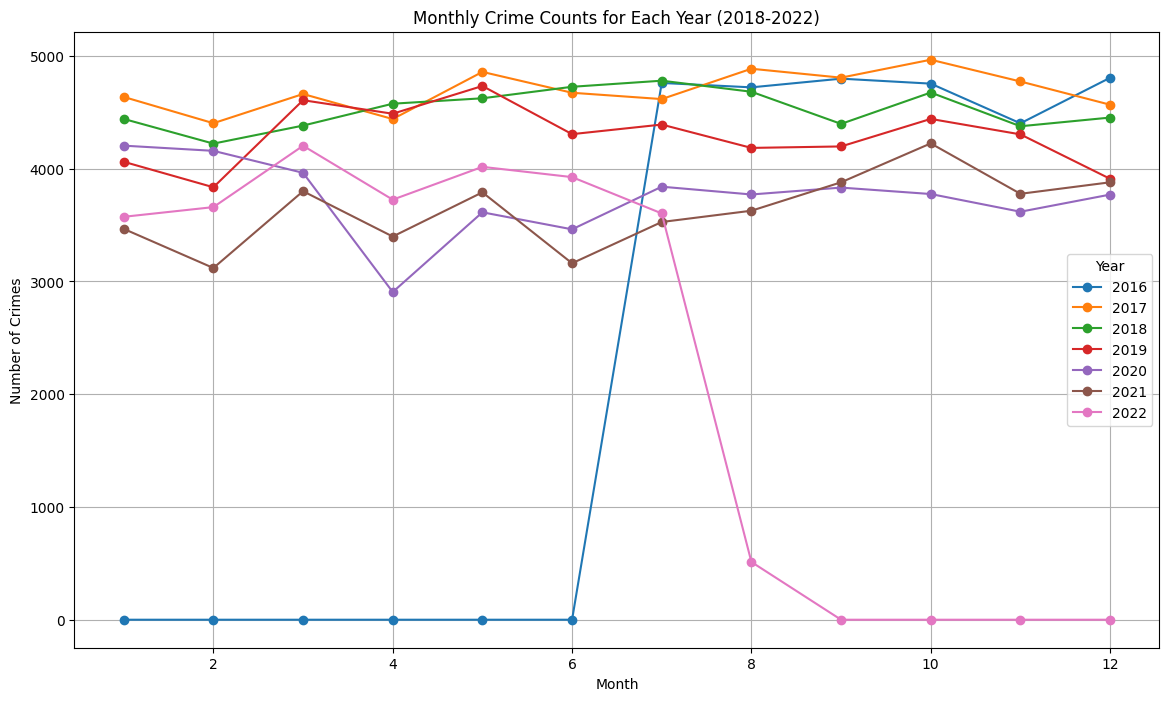

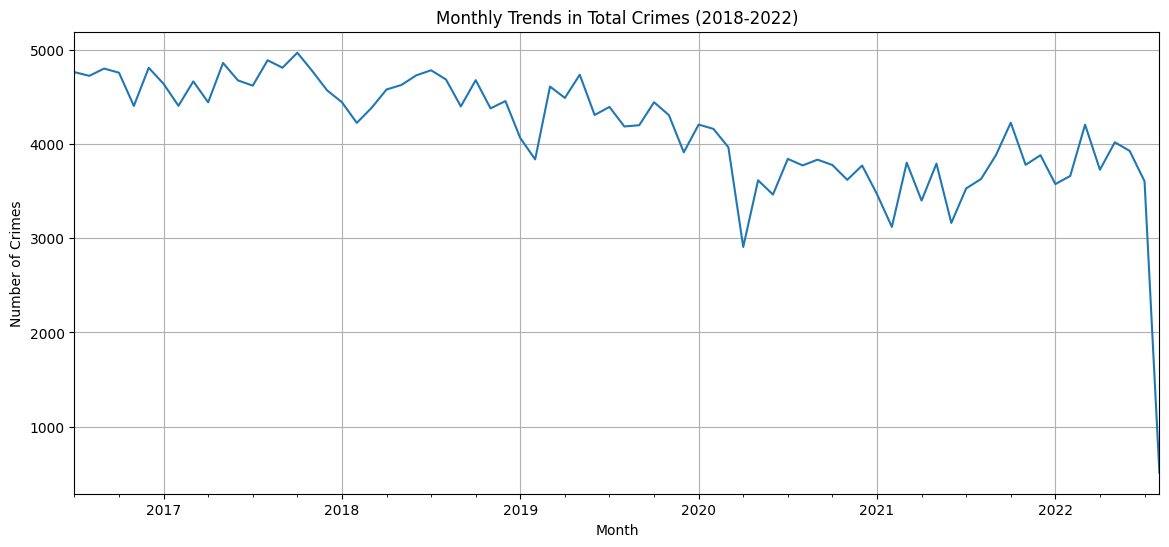

<Figure size 1400x1000 with 0 Axes>

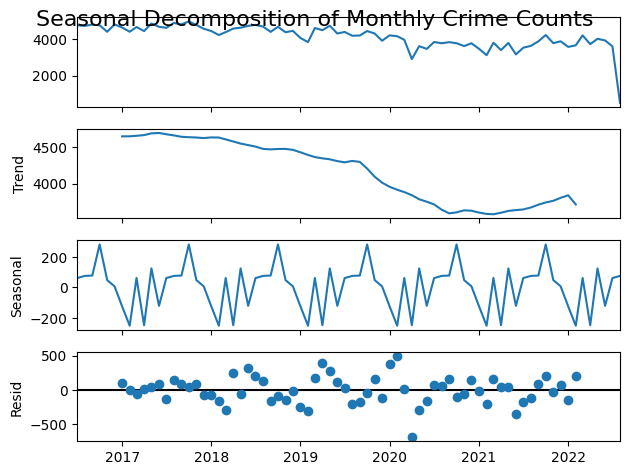

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = '/content/drive/MyDrive/Crime_Dataset_Coursework1.csv'
crime_data = pd.read_csv(file_path, parse_dates=['Start_Date_Time', 'End_Date_Time'])

# Data Preparation Steps
# Step 1: Check for missing values
missing_values = crime_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Step 2: Handle missing values
# For simplicity, fill missing Latitude and Longitude with the mean of the column
crime_data['Latitude'].fillna(crime_data['Latitude'].mean(), inplace=True)
crime_data['Longitude'].fillna(crime_data['Longitude'].mean(), inplace=True)

# Step 3: Convert categorical columns to consistent formats (if needed)
crime_data['Crime Name1'] = crime_data['Crime Name1'].str.upper()
crime_data['Police District Name'] = crime_data['Police District Name'].str.title()

# Step 4: Extract useful time-related features using 'Start_Date_Time'
crime_data['Year'] = crime_data['Start_Date_Time'].dt.year
crime_data['Month'] = crime_data['Start_Date_Time'].dt.month
crime_data['YearMonth'] = crime_data['Start_Date_Time'].dt.to_period('M')
crime_data['Hour'] = crime_data['Start_Date_Time'].dt.hour

# Step 5: Clean non-numerical values in critical columns (if any)
# Ensure 'Year' column has only valid numerical values
crime_data = crime_data[pd.to_numeric(crime_data['Year'], errors='coerce').notnull()]
crime_data['Year'] = crime_data['Year'].astype(int)

# Verify the data after preparation
print("Data Preparation Complete. Sample Data:")
print(crime_data.head())

# Get each month's crime count for each year
monthly_yearly_crime_counts = crime_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
print("Monthly Crime Counts for Each Year:")
print(monthly_yearly_crime_counts)

# Plot monthly crime counts for each year
plt.figure(figsize=(14, 8))
monthly_yearly_crime_counts.T.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Crime Counts for Each Year (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Year')
plt.show()

# 1. Monthly Trends in Total Crimes (RQ1)
monthly_crime_counts = crime_data.groupby('YearMonth').size()
plt.figure(figsize=(14, 6))
monthly_crime_counts.plot(kind='line')
plt.title('Monthly Trends in Total Crimes (2018-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# Seasonal Decomposition
# Convert to time series
monthly_crime_counts_ts = monthly_crime_counts.to_timestamp()
result = seasonal_decompose(monthly_crime_counts_ts, model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(14, 10))
result.plot()
plt.suptitle('Seasonal Decomposition of Monthly Crime Counts', fontsize=16)
plt.show()